In [1]:
import pandas as pd
import statistics as stats
# import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('quiz.csv')
df.head()

,date,age,nationality,old_level,mod_failed,gender,avg_1st_sem,cont_study
0,20/07/2021 10:13,30,Irish,8,2,Female,55,1
1,20/07/2021 11:10,28,Irish,7,1,Female,54,1
2,21/07/2021 16:45,26,Irish,7,1,Male,67,0
3,21/07/2021 17:23,34,Other,6,1,Male,54,0
4,21/07/2021 21:19,33,Irish,7,0,Female,75,0


In [27]:
#CENTRAL TENDENCY
mean = df['age'].mean()
print(mean)


median = df['age'].median()
print(median)


mode = df['age'].mode()
print(mode)


33.15
33.5
0    34
dtype: int64


In [28]:
#variance is 
var=stats.variance(df['age'])
print(var)

31.607894736842105


In [29]:
print(var/mean*100)

95.34809875367152


In [30]:
#standard deviation
sd = df['age'].std()
print(sd)

5.622089890498203


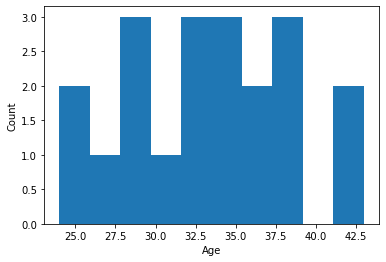

In [31]:
#HISTOGRAM
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 0, 'Median location')

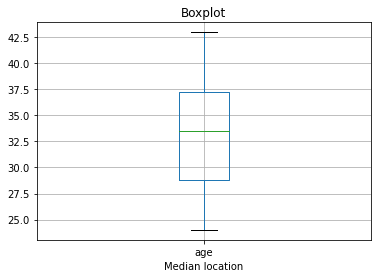

In [32]:
#boxplot
df.boxplot('age')
plt.title('Boxplot')
plt.xlabel('Median location')

Grades Mean:  68.45
Median:  70.0
Grades Mode:  0    73
dtype: int64
Grades Var:  110.8921052631579
Grades SD:  10.5305320503362


Text(0.5, 0, 'Grades Median location')

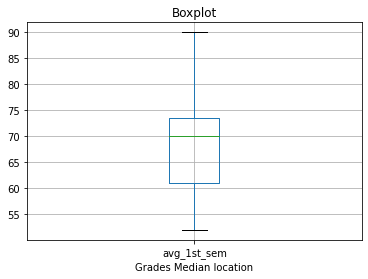

In [8]:
#grades
#CENTRAL TENDENCY
mean_grades = df['avg_1st_sem'].mean()
print('Grades Mean: ',mean_grades)


median_grades = df['avg_1st_sem'].median()
print('Median: ',median_grades)


mode_grades = df['avg_1st_sem'].mode()
print('Grades Mode: ',mode_grades)

var_grades=stats.variance(df['avg_1st_sem'])
print('Grades Var: ',var_grades)

sd_grades = df['avg_1st_sem'].std()
print('Grades SD: ',sd_grades)

df.boxplot('avg_1st_sem')
plt.title('Boxplot')
plt.xlabel('Grades Median location')




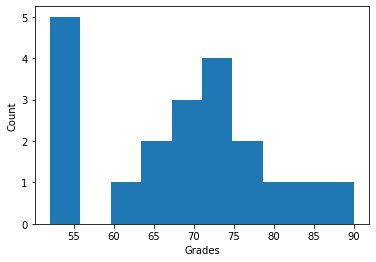

In [37]:
plt.hist(df['avg_1st_sem'])
plt.xlabel('Grades')
plt.ylabel('Count')
plt.show()

In [58]:
#failing module in 1st semester
#CENTRAL TENDENCY
mean_failed = df['mod_failed'].mean()
print('Fail Modules Mean: ',mean_failed)

median_failed = df['mod_failed'].median()
print('Fail Modules Median: ',median_failed)


mode_failed = df['mod_failed'].mode()
print('Fail Modules Mode: ',mode_failed)

var_failed=stats.variance(df['mod_failed'])
print('Fail Modules Var: ',var_failed)

sd_failed = df['mod_failed'].std()
print('Fail Modules SD: ',sd_failed)

# countf = 0
# for i in range(20):
#     if df['mod_failed'][i]>0:
#         countf+=1
# print('Percentage of students that failed a module: ',countf/20*100)

Fail Modules Mean:  0.6
Fail Modules Median:  1.0
Fail Modules Mode:  0    1
dtype: int64
Fail Modules Var:  0.35789473684210527
Fail Modules SD:  0.5982430416161189


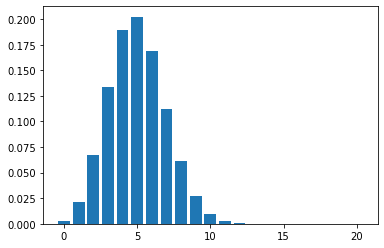

In [43]:
#binomial distribution
from scipy.stats import binom
import matplotlib.pyplot as plt
n = 20
p = 0.25
rValues = list(range(n + 1))
di = [binom.pmf(r, n, p) for r in r_values ]
plt.bar(rValues, di)
plt.show()

In [46]:
#no students starting new course so k=0
solution = binom.pmf(k=0, n = 20, p=0.25)
print('Probability of no students continuing: ', solution)

Probability of no students continuing:  0.0031712119389339963


In [47]:
print("Number of students that want to continue study: ", n*p)

Number of students that want to continue study:  5.0


In [59]:
#Poisson
print('Probability to fail more than 2 modules: ', 1-0.9197)

Probability to fail more than 2 modules:  0.08030000000000004


In [92]:
#normal distribution
import numpy as np
from scipy.stats import norm

mu, std = norm.fit(df['avg_1st_sem'])
print(mu,'\n',std)

68.45 
 10.263893023604641


In [61]:
#as per google, good way to see if data normally distributed, is if p>0.05
from scipy.stats import shapiro
#perform Shapiro-Wilk test
print(shapiro(df['avg_1st_sem']))

ShapiroResult(statistic=0.9493924975395203, pvalue=0.3579622209072113)


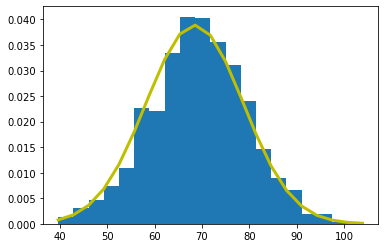

In [93]:
#normal distribution
s = np.random.normal(68.45, 10.26, 1000)
# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20,density=True)
# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
plt.show()

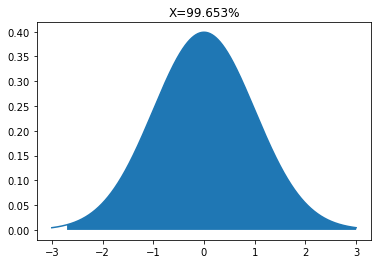

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def z_score_plot(x, cond, mu, sigma, title):
    y = norm.pdf(x, mu, sigma)
    z = x[cond]
    plt.plot(x, y)
    plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
    plt.title(title)
    plt.show()

x=np.arange(-3,3,0.001)
z0 =-2.7
z_score_plot(x, x>z0, 0, 1,'X=99.653%' )

In [7]:
#Confidence interval average grades
import scipy.stats as stat
import numpy as np
stat.t.interval(alpha=0.95, df=len(df['avg_1st_sem'])-1, loc=np.mean(df['avg_1st_sem']), scale=stat.sem(df['avg_1st_sem'])) 

(63.521559293176075, 73.37844070682394)

In [11]:
#96 % Confidence interval average age
stat.t.interval(alpha=0.96, df=len(df['age'])-1, loc=np.mean(df['age']), scale=stat.sem(df['age'])) 

(30.378387218032906, 35.92161278196709)